In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Data import

## Test setup
Falta infos do teste 61403070

In [55]:
df_test_setup_raw = pd.read_excel('./data/test_summary.xlsx')
df_test_setup_raw.head()

,Unnamed: 0,Test ID [#],Cold start (CSt) Hot start [HSt],Date,Test Cell Temp [C],Test Cell RH [%],Test Cell Baro [in/Hg],Vehicle cooling fan speed: Speed Match [SM] or constant speed [CS],Solar Lamps [W/m2],Vehicle Climate Control settings,...,Window Position [Closed] or [Down],Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Order,Charge
0,0.0,61403061,CS,03/13/14,-7.0,7.1,29.4,SM,0.0,72,...,Closed,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,1
1,1.0,61403062,HS,03/13/14,-5.0,7.3,29.4,SM,0.0,72,...,Closed,10.24,-,7.726,376.0,3052.1,297.9,HWY #1,2,1
2,2.0,61403063,HS,03/13/14,-7.0,8.2,29.4,SM,0.0,73,...,Closed,7.47,-,5.711,373.1,2346.3,314.2,UDDS #2,3,1
3,3.0,61403064,HS,03/13/14,-4.0,6.8,29.4,SM,0.0,74,...,Closed,8.02,-,7.979,358.7,2906.3,362.4,US06 #1,4,1
4,4.0,61403065,HS,03/13/14,-4.0,7.2,29.4,SM,0.0,75,...,Closed,8.02,-,7.910,351.9,2856.6,356.0,US06 #2,5,1


In [56]:
df_test_setup_raw['Test ID [#]'] = df_test_setup_raw['Test ID [#]'].astype(str) 

In [57]:
df_test_setup_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 21 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Unnamed: 0                                                          27 non-null     float64
 1   Test ID [#]                                                         36 non-null     object 
 2   Cold start (CSt) Hot start [HSt]                                    33 non-null     object 
 3   Date                                                                33 non-null     object 
 4   Test Cell Temp [C]                                                  33 non-null     float64
 5   Test Cell RH [%]                                                    33 non-null     float64
 6   Test Cell Baro [in/Hg]                                              33 non-null     float64
 7   Vehicle cooling fan

## Test measurements

In [58]:
data_path = './data/raw'
raw_files = os.listdir(data_path)
df_discharging_raw = pd.DataFrame()
df_charging_raw = pd.DataFrame()

for idx, filename in enumerate(raw_files):
    filepath = os.path.join(data_path, filename)    
    df = pd.read_csv(filepath, sep='\s+', index_col=False)
    if 'Charge' not in filename:
        test_id = filename.split(' ')[0]
        df['test_id'] = test_id
        df_discharging_raw = pd.concat([df_discharging_raw, df])
    else:
        charge_id = filename.split('_')[0]
        df['test_id'] = charge_id
        df_charging_raw = pd.concat([df_charging_raw, df])

data_path = './data/raw'
raw_files = os.listdir(data_path)
df_discharging_raw = pd.DataFrame()
df_charging_raw = pd.DataFrame()

for idx, filename in enumerate(raw_files):
    print(filename)

In [59]:
# df_discharging_raw = df_discharging_raw.loc[df_discharging_raw['test_id'] != 61403070]

In [60]:
df_discharging_raw.head()

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],test_id
0,-10.0,0.009,-12.170,22.256,40.693,0.0,-0.043,0.438,0.0,0.0,61403011
1,-9.9,0.010,-12.332,22.256,40.696,0.0,-0.037,0.437,0.0,0.0,61403011
2,-9.8,0.010,-12.272,22.256,40.694,0.0,-0.048,0.435,0.0,0.0,61403011
3,-9.7,0.009,-12.146,22.256,40.694,0.0,-0.052,0.438,0.0,0.0,61403011
4,-9.6,0.010,-12.240,22.255,40.693,0.0,-0.050,0.439,0.0,0.0,61403011


In [61]:
df_charging_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41508 entries, 0 to 14468
Data columns (total 30 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Time[s]                                                    41508 non-null  int64  
 1   Voltage[V]_HV_Power_Distribution_Module_net                41508 non-null  float64
 2   Current[A]_HV_Power_Distribution_Module_net                41508 non-null  float64
 3   Integrated_Current[Ah]_HV_Power_Distribution_Module_net    41508 non-null  float64
 4   Integrated_Power[Wh]_HV_Power_Distribution_Module_net      41508 non-null  float64
 5   Voltage[V]_12V_DCDC_Out                                    41508 non-null  float64
 6   Current[A]_12V_DCDC_Out                                    41508 non-null  float64
 7   Integrated_Current[Ah]_12V_DCDC_Out                        41508 non-null  float64
 8   Integr

# Data manipulation

In [64]:
# merging dataframes
df_discharging_merged = df_discharging_raw.merge(df_test_setup_raw, left_on='test_id', right_on='Test ID [#]')

In [65]:
df_discharging_merged.head()

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Window Position [Closed] or [Down],Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Order,Charge
0,-10.0,0.009,-12.170,22.256,40.693,0.0,-0.043,0.438,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
1,-9.9,0.010,-12.332,22.256,40.696,0.0,-0.037,0.437,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
2,-9.8,0.010,-12.272,22.256,40.694,0.0,-0.048,0.435,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
3,-9.7,0.009,-12.146,22.256,40.694,0.0,-0.052,0.438,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2
4,-9.6,0.010,-12.240,22.255,40.693,0.0,-0.050,0.439,0.0,0.0,...,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,1,2


In [63]:
df_grouped = df_discharging_merged.groupby(['Charge', 'test_id'])

past_charge = 1
for ids, data in df_grouped:
    current_charge = id[0]
    current_test = id[1]
    if current_charge == past_charge:
        df.loc[df['test_id'] ]
        
        test_acumulated_duration += data['Time[sec]'].sum()
        df
    else: 
        test_acumulated_duration = data['Time[sec]'].sum()

(1, '61403061')
(1, '61403062')
(1, '61403063')
(1, '61403064')
(1, '61403065')
(1, '61403066')
(1, '61403067')
(2, '61403011')
(2, '61403012')
(2, '61403013')
(2, '61403014')
(2, '61403015')
(2, '61403016')
(2, '61403017')
(2, '61403018')
(2, '61403019')
(2, '61403020')
(3, '61403070')
(3, '61403072')
(3, '61403074')
(3, '61403100')
(3, '61403102')
(3, '61403103')
(4, '61403021')
(4, '61403022')
(4, '61403023')
(4, '61403024')
(4, '61403025')
(4, '61403026')
(4, '61403027')
(4, '61403028')
(4, '61403029')
(4, '61403030')


In [ ]:
# get the acumulated time
def get_acumulated_time(df):
    df_grouped = df.groupby('test_id')
    

$𝐴ℎ𝑗 = 𝐴ℎ_{𝑗-1} + 𝑖 ∙ (∆𝑡/3600)$

$𝑆𝑂𝐶𝑗 = 𝑆𝑂𝐶_0 + 100 ∙ \dfrac{𝐴ℎ_𝑗}{𝐴ℎ_{cap}}  $

In [43]:
def get_vehicle_SOC(df):
    df["AHj"] = df['Ahj'].shift(-1) + df['HV_Battery_Current[A]'] * (df['Time[sec]'] / 3600)
    return df

In [44]:
df_copy = get_vehicle_SOC(df)
df_copy.head()

KeyError: 'Ahj'

# Data visualization

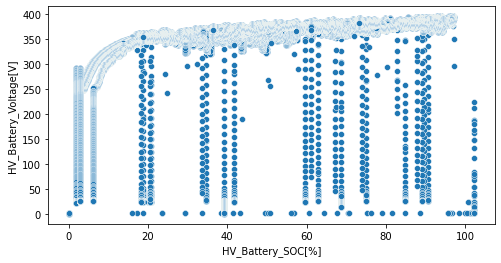

In [25]:
# All tests combined
plt.figure(figsize=(8,4))

sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=df_discharging_raw)

plt.show()

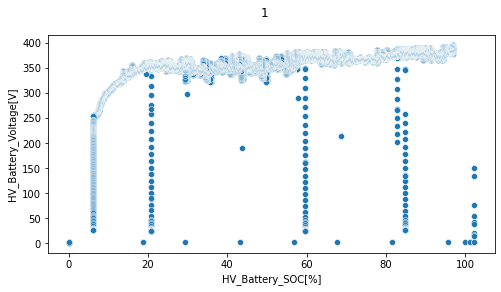

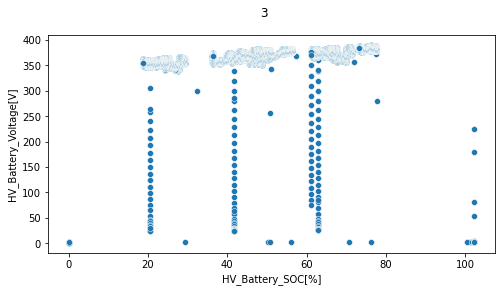

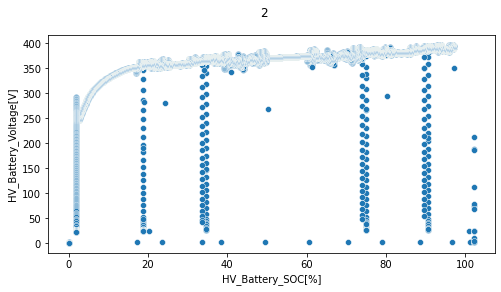

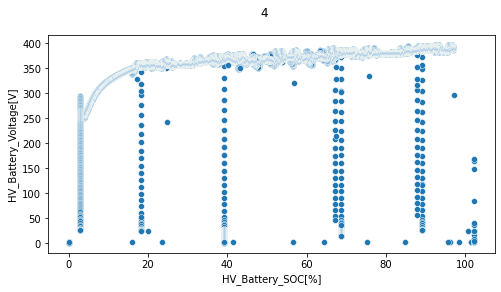

In [26]:
# Each graph represents a charge
charge_ids = df_test_setup_raw['Charge'].unique()

for id_c in charge_ids:
    f = plt.figure(figsize=(8, 4))
    
    test_ids = df_test_setup_raw.loc[df_test_setup_raw['Charge'] == id_c]['Test ID [#]']
    test_data = pd.DataFrame()
    actual_test= pd.DataFrame()
    for id_t in test_ids:
        actual_test = df_discharging_raw[df_discharging_raw['test_id'] == id_t]
        test_data = pd.concat([test_data, actual_test])
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data)
    f.suptitle(f"{id_c}")

C:\Users\muril\AppData\Local\Temp\ipykernel_5048\1375548559.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(8, 4))


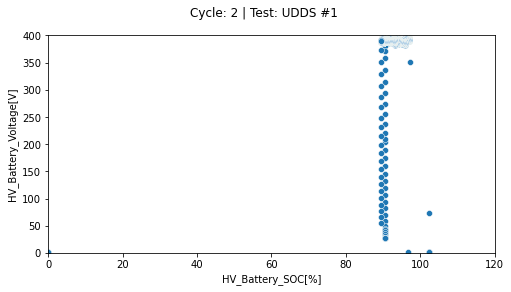

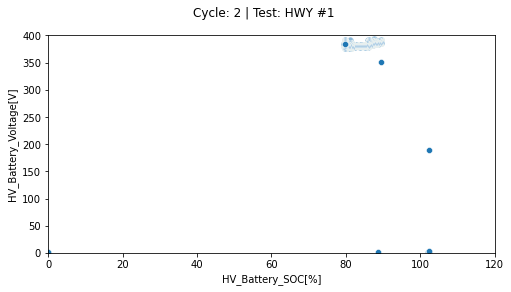

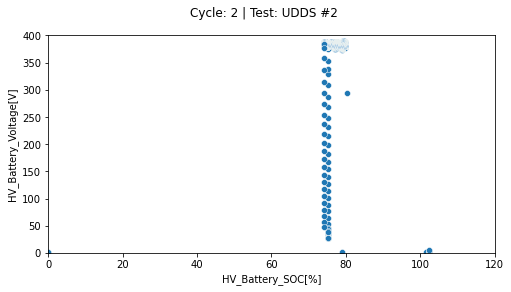

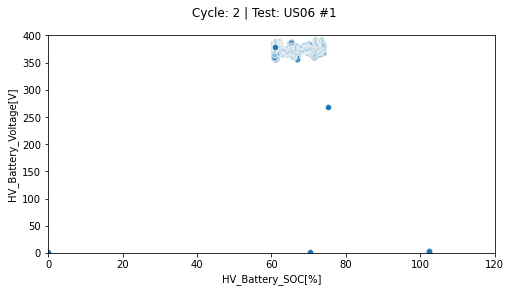

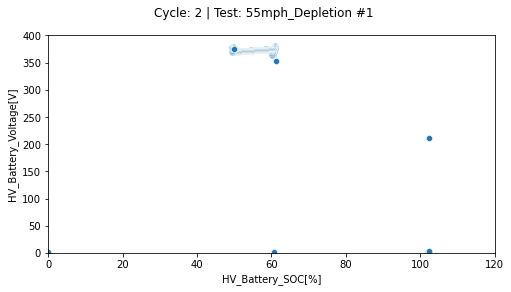

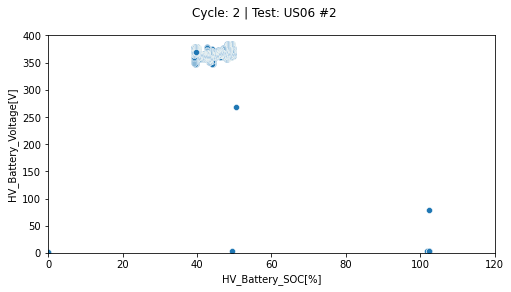

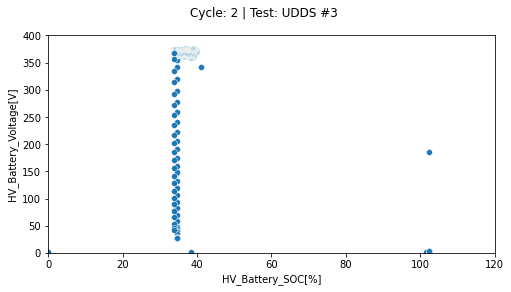

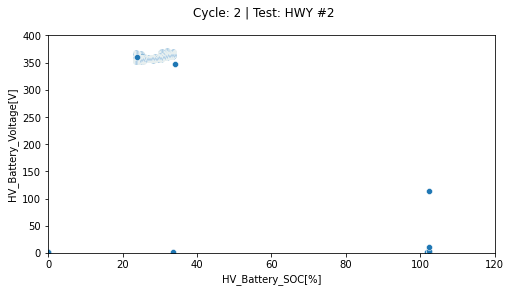

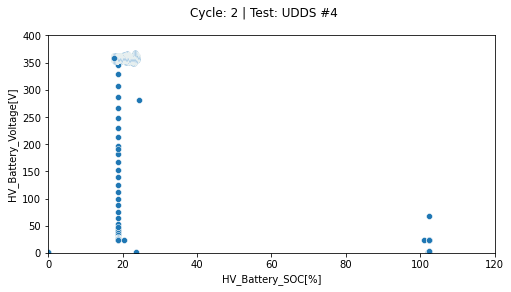

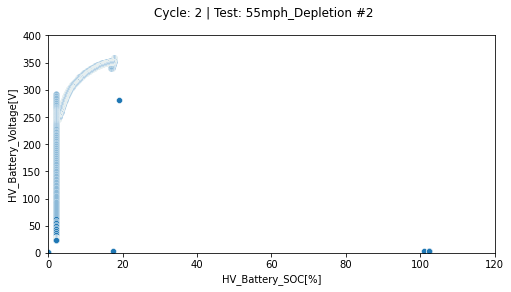

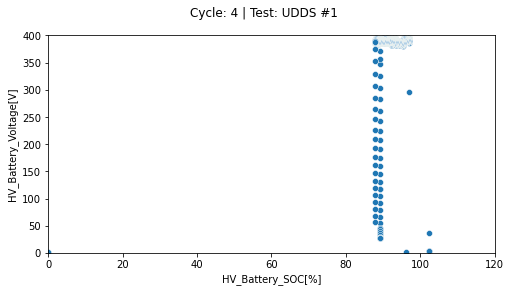

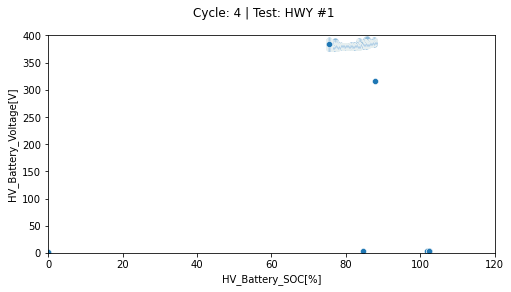

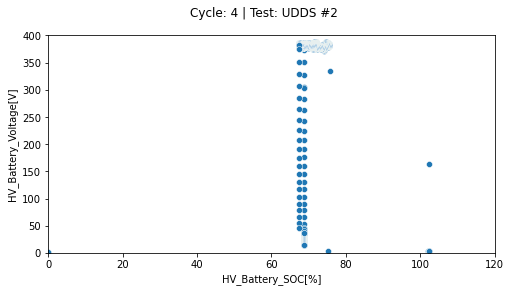

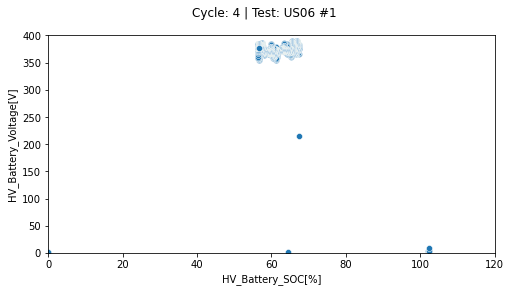

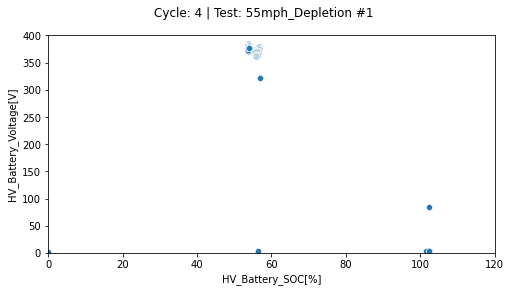

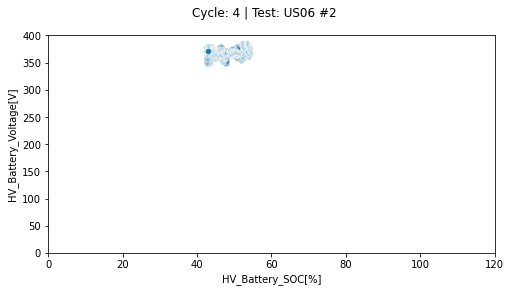

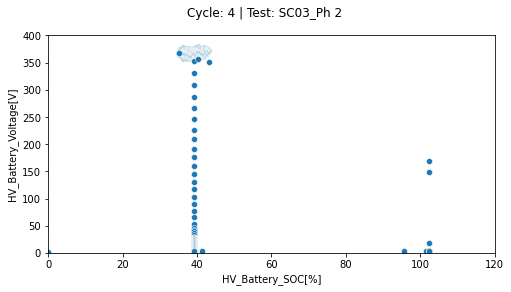

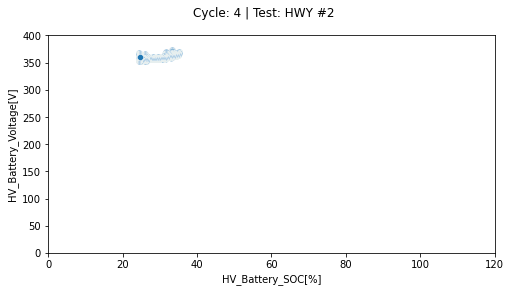

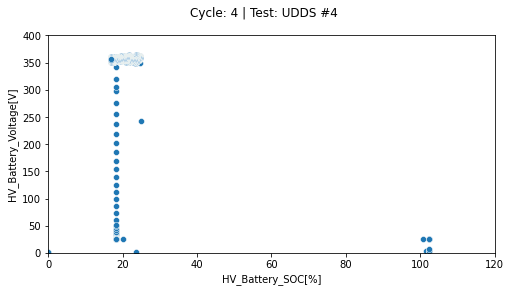

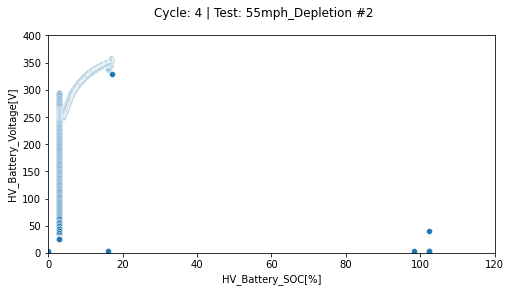

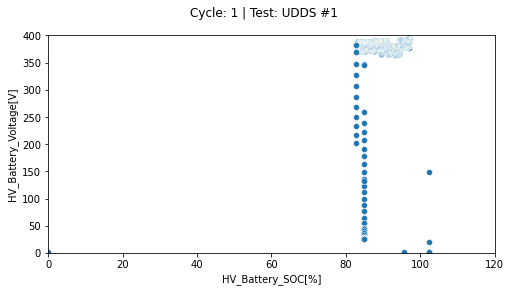

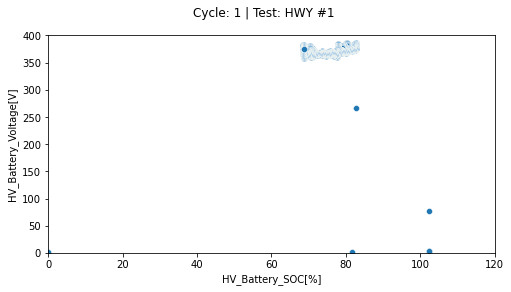

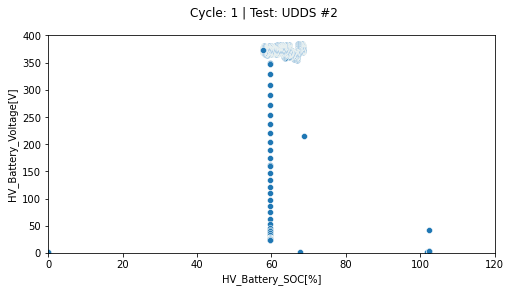

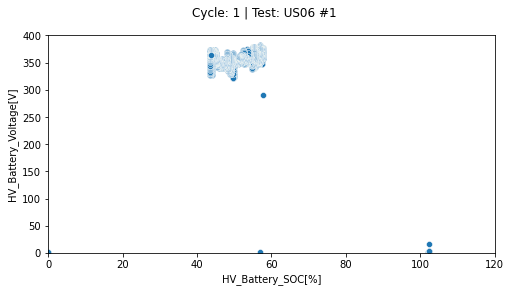

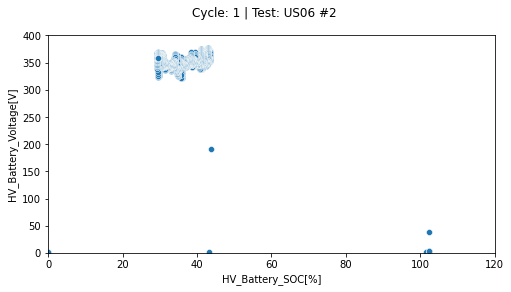

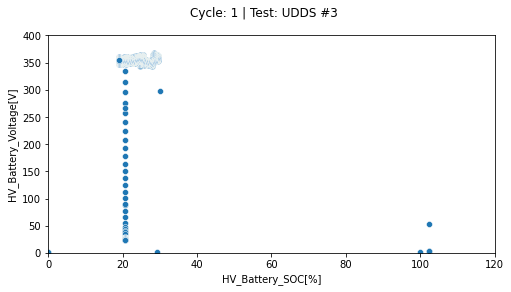

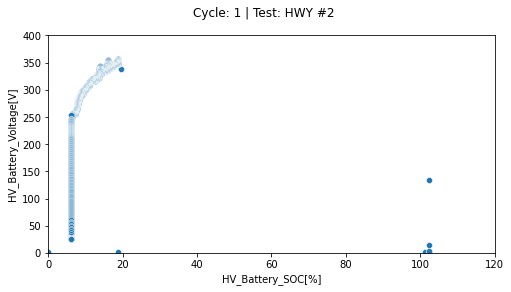

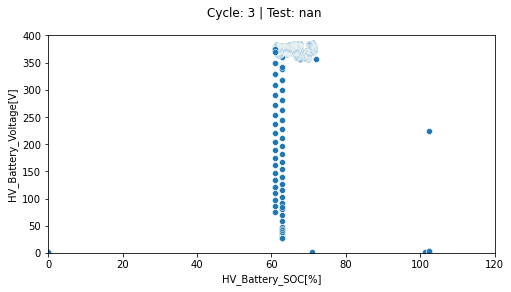

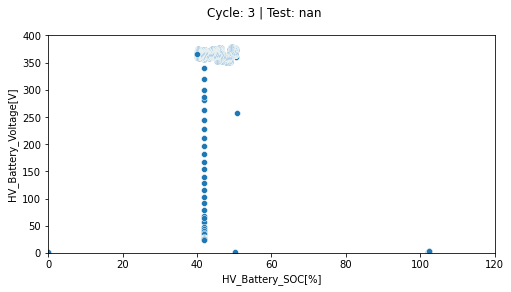

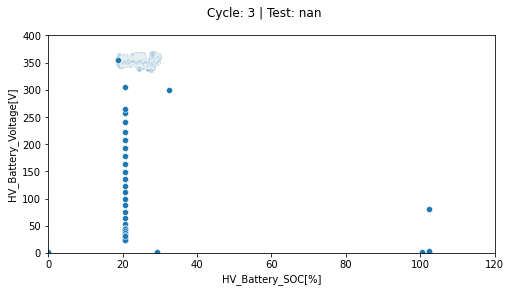

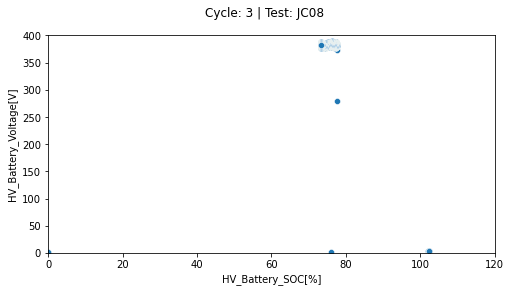

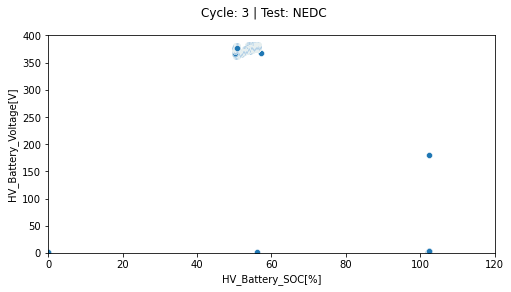

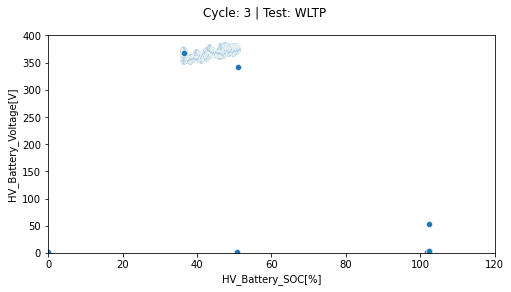

In [27]:
# Each test in each charge
test_ids = df_discharging_raw['test_id'].unique()

for id in test_ids:
    f, ax = plt.subplots(figsize=(8, 4))
    try:
        test_data = df_discharging_raw.loc[df_discharging_raw['test_id'] == id]
        test_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == str(id)]['Cycle']
        charge_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == str(id)]['Charge']
        sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data, ax=ax)
        ax.set_xlim(0, 120)
        ax.set_ylim(0, 400)

        f.suptitle(f"Cycle: {charge_id.item()} | Test: {test_id.item()}")
    except:
        print(id)

In [28]:
df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == '61403067']['Cycle']

6    HWY #2
Name: Cycle, dtype: object

C:\Users\muril\AppData\Local\Temp\ipykernel_5048\777355507.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(8, 4))


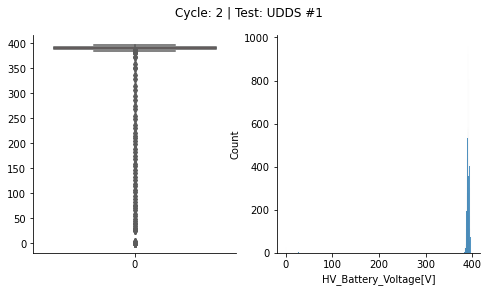

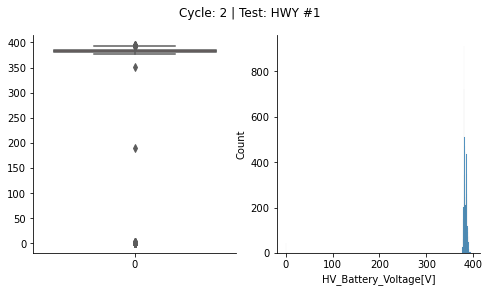

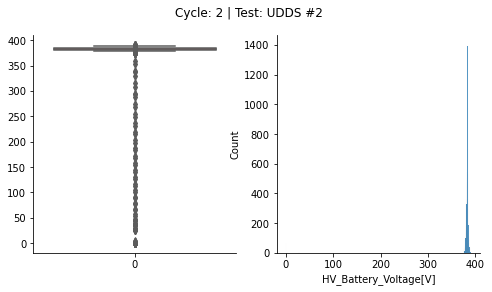

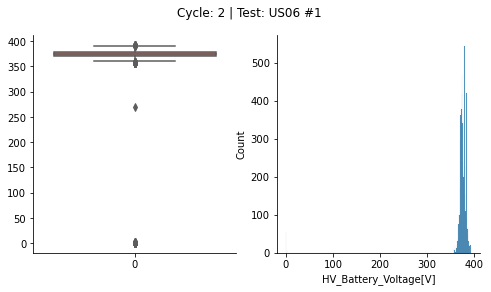

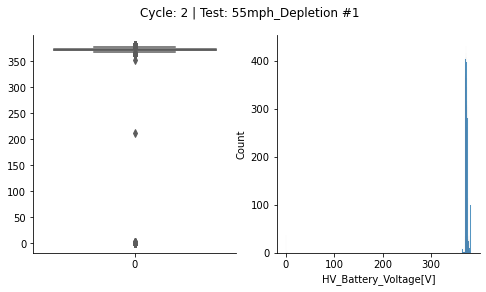

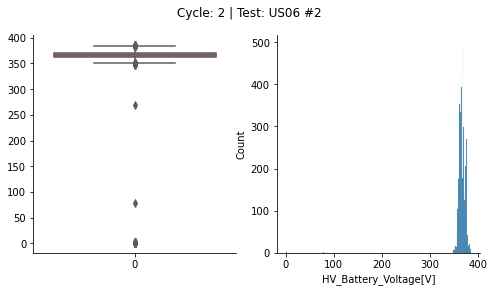

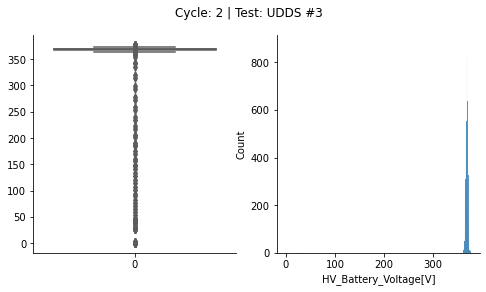

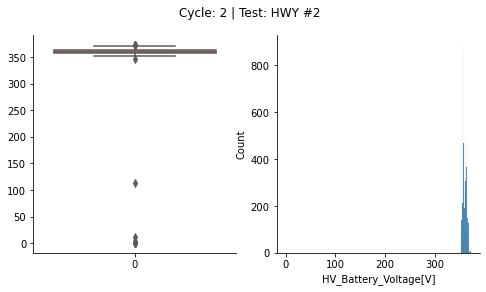

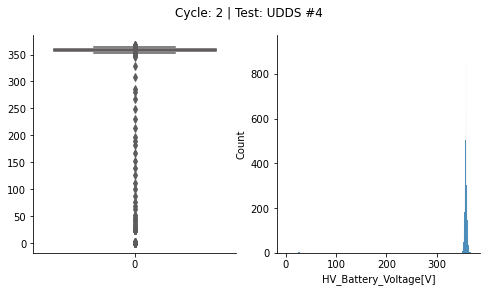

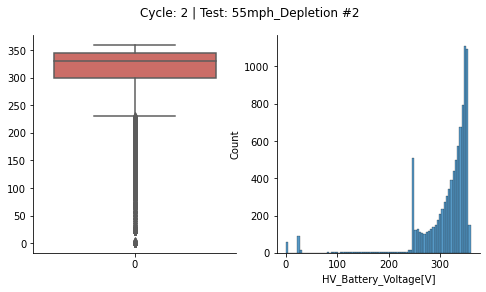

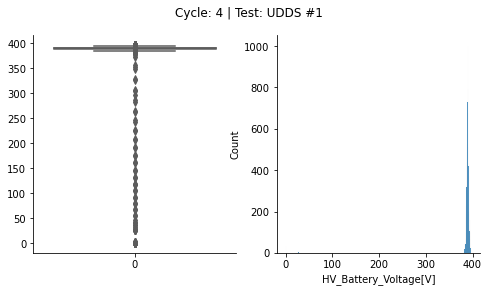

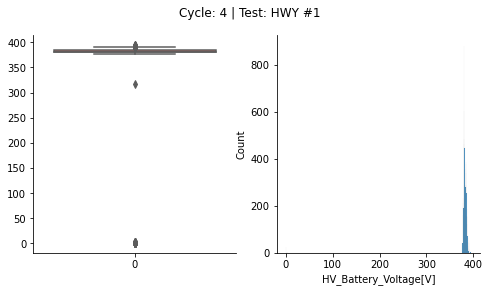

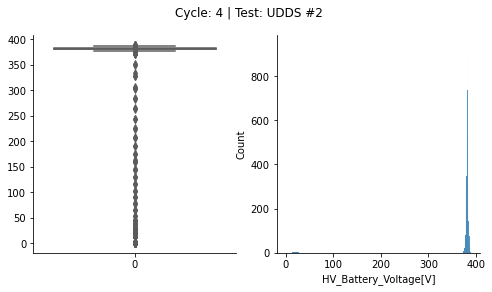

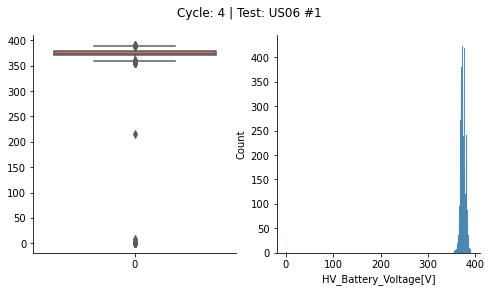

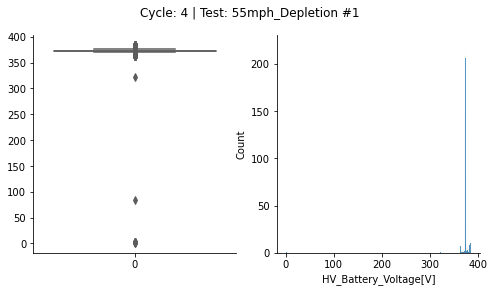

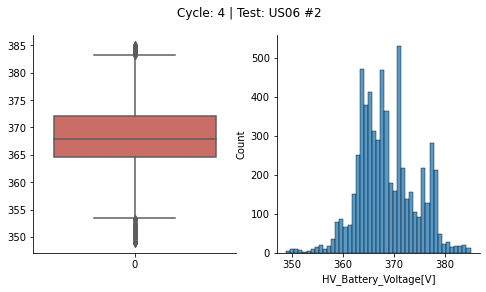

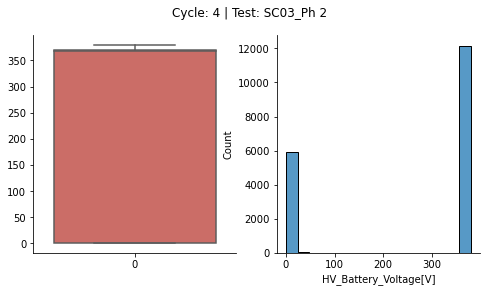

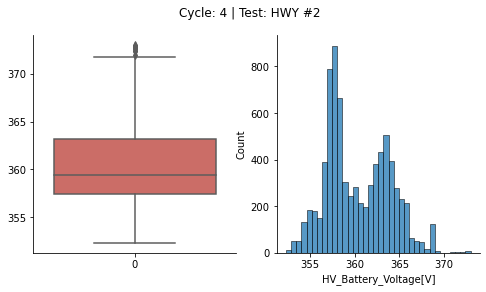

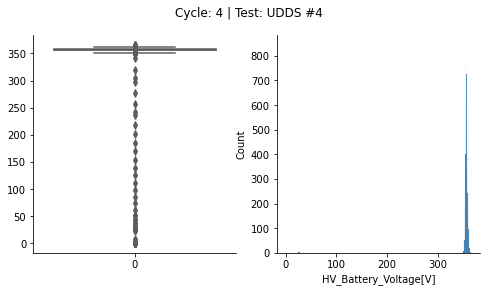

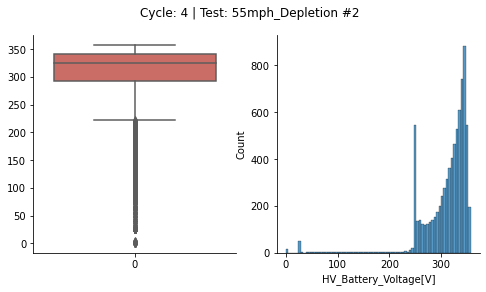

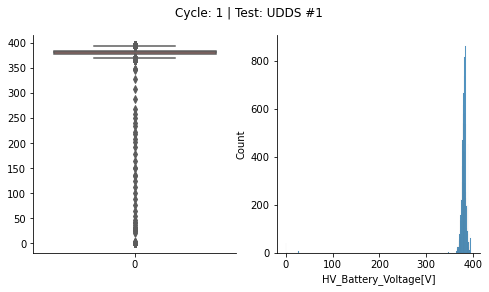

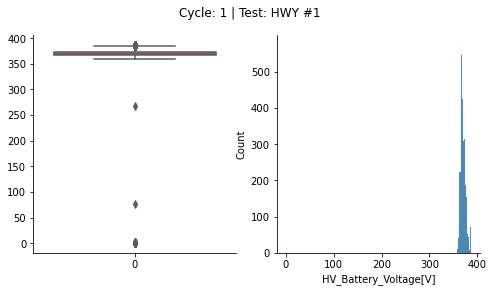

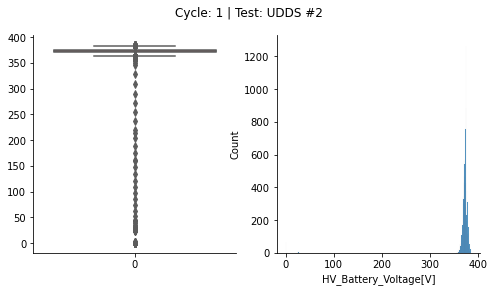

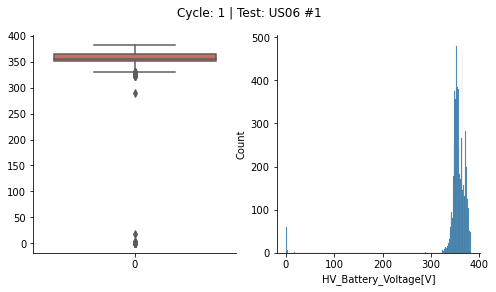

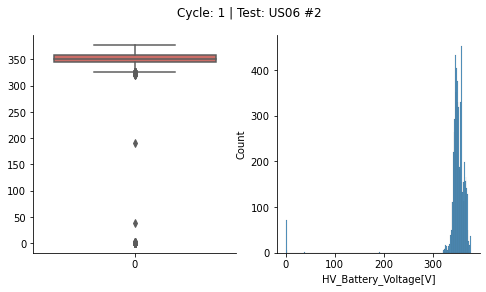

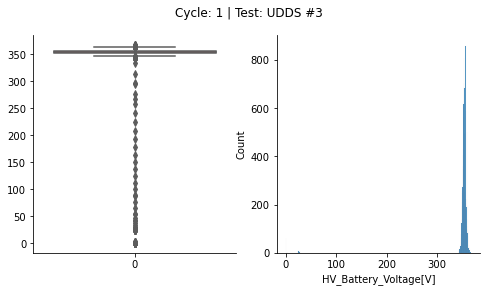

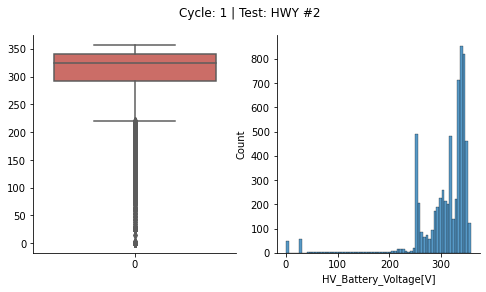

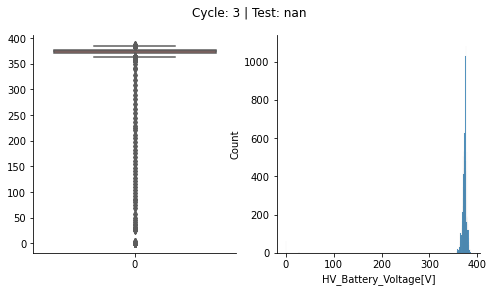

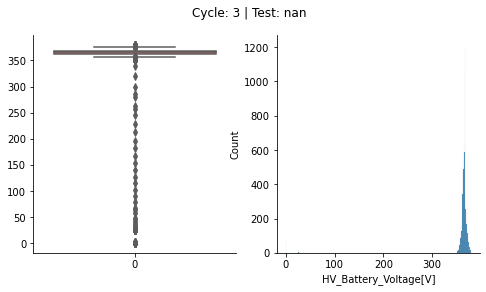

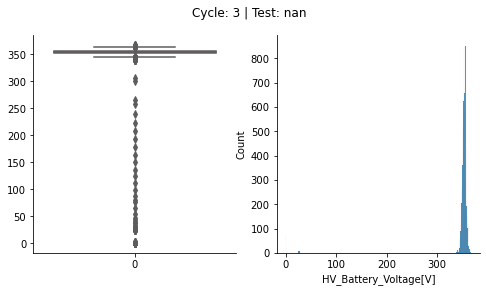

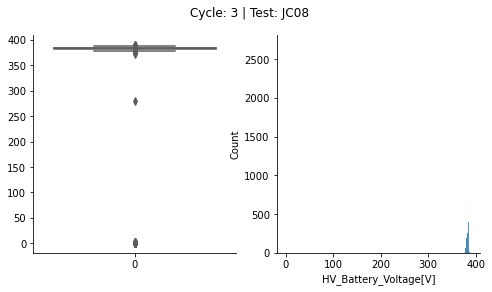

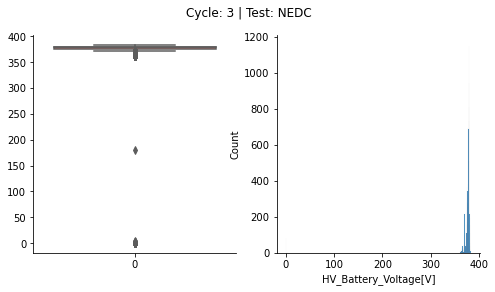

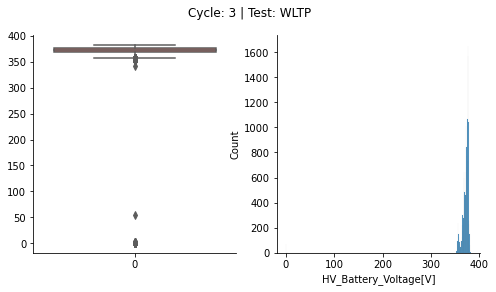

In [29]:
test_ids = df_discharging_raw['test_id'].unique()

for id in test_ids:
    f = plt.figure(figsize=(8, 4))
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    test_data = df_discharging_raw.loc[df_discharging_raw['test_id'] == id]
    test_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Cycle']
    charge_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Charge']
    voltage_test_data = test_data['HV_Battery_Voltage[V]']
    sns.boxplot(data=voltage_test_data, palette='hls',ax=ax1)
    sns.histplot(data=voltage_test_data, palette='hls', ax=ax2)
    f.suptitle(f"Cycle: {charge_id.item()} | Test: {test_id.item()}")
    sns.despine(top=True, right=True)

### Checking outliers
There is a lot of noise in the data, specially on the beggining of a test cycle.
This section provides a way of dealing with this noise.

In [49]:
df_discharging_merged.to_parquet('./data/processed/df_discharging_raw.parquet')

In [31]:
df_discharging_merged.columns

Index(['Time[sec]', 'Dyno_Speed[mph]', 'Dyno_Tractive_Effort[N]',
       'Test_Cell_Temp[C]', 'Test_Cell_RH[%]', 'Phase_#',
       'HV_Battery_Current[A]', 'HV_Battery_Voltage[V]', 'HV_Battery_SOC[%]',
       'Accelerator_Pedal_Position[%]', 'test_id', 'Unnamed: 0', 'Test ID [#]',
       'Cold start (CSt) Hot start [HSt]', 'Date', 'Test Cell Temp [C]',
       'Test Cell RH [%]', 'Test Cell Baro [in/Hg]',
       'Vehicle cooling fan speed: Speed Match [SM] or constant speed [CS]',
       'Solar Lamps [W/m2]', 'Vehicle Climate Control settings',
       'Hood Position [Up] or [Closed]', 'Window Position [Closed] or [Down]',
       'Cycle Distance [mi]', 'Cycle Fuel economy [mpg] (Emiss Bag)',
       'Cycle HV battery Integrated net current [DC Ah]',
       'Cycle HV battery Average Zero crossing Voltage [V]',
       'Cycle HV battery Net Energy [DC Wh]',
       'Cycle HV battery Net Energy Consumption[DC Wh/mi]', 'Cycle', 'Charge'],
      dtype='object')

In [32]:
pd.set_option('display.max_rows', None)

In [33]:
df_grouped = df_discharging_merged.groupby('test_id')
df_frst_last = pd.DataFrame()

# Iterate over each group and print the first 5 and last 5 rows
for name, test in df_grouped:
    frst = test.head(60)
    last = test.tail(40)

    df_frst_last = pd.concat([df_frst_last, frst, last])
df_frst_last[['test_id', 'Time[sec]','HV_Battery_SOC[%]']]

,test_id,Time[sec],HV_Battery_SOC[%]
0,61403011,-10.000,0.000
1,61403011,-9.900,0.000
2,61403011,-9.800,0.000
3,61403011,-9.700,0.000
4,61403011,-9.600,0.000
5,61403011,-9.500,0.000
6,61403011,-9.400,0.000
7,61403011,-9.300,0.000
8,61403011,-9.200,0.000
9,61403011,-9.100,0.000


In [34]:
def drop_intial_charge_noise(df):
    """
    Locate the intial measurements.
    """
    df = df.loc[(df['HV_Battery_SOC[%]'] < 100)]
    df_grouped = df.groupby(['HV_Battery_SOC[%]'])
    highest_soc = 0
    for ids, data in df_grouped:
        if len(data) > 40 and ids > highest_soc:
            start_test_index = data.index.max()
            highest_soc = ids
    return start_test_index

def drop_soc_noise(df):
    """
    The last SoC of a test, is the intial SoC of the following test. 
    So It iterates over the dataframe, getting the last SoC measured in each test.
    Which is used to find the row where the next test measurements starts.
    
    Also, it eliminates:
    - SoC bigger than 100%
    
    """
    df = df.loc[(df['HV_Battery_SOC[%]'] < 100)]
    df['delta_SOC'] = df['HV_Battery_SOC[%]'].diff()
    df_grouped = df.groupby(['Charge','test_id'])
    df_cleaned = pd.DataFrame()
    
    last_SOC_measured = df['HV_Battery_SOC[%]'].head(1)
    last_SOC_measured = last_SOC_measured.values[0]
    
    past_charge = 0
    for ids, test_data in df_grouped:
        if past_charge != ids[0]: # it means that it's the start of a new test on a new charge
            start_SOC_index = drop_intial_charge_noise(test_data)
            past_charge = ids[0]
        else:
            start_SOC_index = df.loc[df['HV_Battery_SOC[%]'] == last_SOC_measured].index.min()
            
        last_SOC_measured = test_data['HV_Battery_SOC[%]'].tail(1).values[0]
        
        result_df = test_data.loc[start_SOC_index:]
        df_cleaned = pd.concat([df_cleaned, result_df])
    return df_cleaned


def drop_voltage_noise(df):
    df = df.loc[df['HV_Battery_Voltage[V]'] != 0]
    df['delta_voltage'] = df['HV_Battery_Voltage[V]'].diff(-1)
    df = df.loc[df['delta_voltage'] > -10]
    df = df.loc[df['delta_voltage'] < 10]
    return df

In [35]:
df_filtered = (df_discharging_merged.pipe(drop_soc_noise)
                                    .pipe(drop_voltage_noise))
df_filtered.head()

C:\Users\muril\AppData\Local\Temp\ipykernel_5048\497574486.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_SOC'] = df['HV_Battery_SOC[%]'].diff()


,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Charge,delta_SOC,delta_voltage
197334,9.9,0.010,-12.351,-6.782,7.017,1.0,5.930,393.832,96.900,0.0,...,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,0.000,0.219
197335,10.0,0.008,-12.392,-6.782,7.016,1.0,6.190,393.613,96.802,0.0,...,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,-0.098,-0.193
197336,10.1,0.008,-12.325,-6.781,7.016,1.0,6.454,393.806,96.800,0.0,...,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,-0.002,0.097
197337,10.2,0.008,-12.244,-6.781,7.015,1.0,6.558,393.709,96.800,0.0,...,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,0.000,0.211
197338,10.3,0.009,-12.228,-6.782,7.016,1.0,6.810,393.498,96.800,0.0,...,7.46,-,6.428,383.3,2911.7,390.5,UDDS #1,1,0.000,-0.212


In [45]:
print(df_filtered.shape)
print(df_discharging_merged.shape)
print(df_discharging_merged.shape[0] - df_filtered.shape[0])

(347390, 33)
(349145, 31)
1755


C:\Users\muril\AppData\Local\Temp\ipykernel_5048\2076817105.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(10, 4))


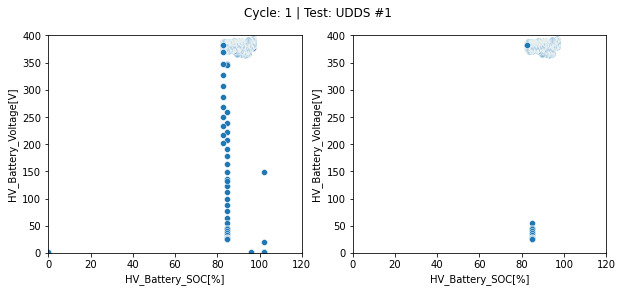

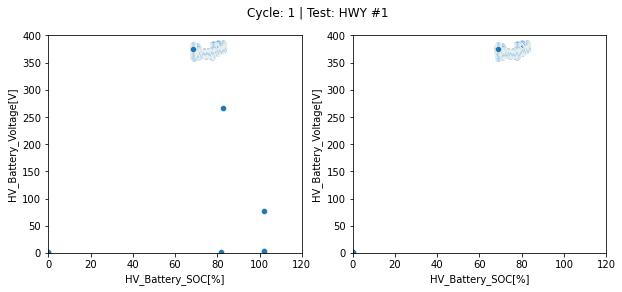

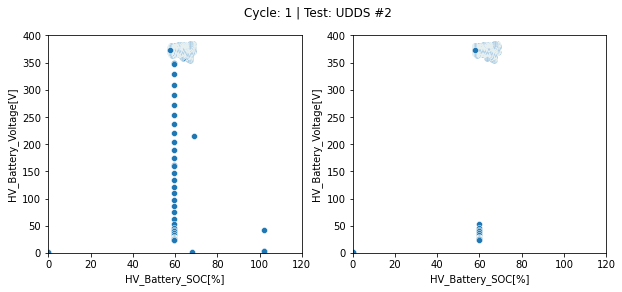

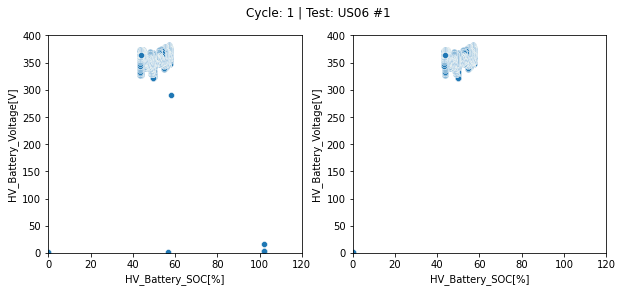

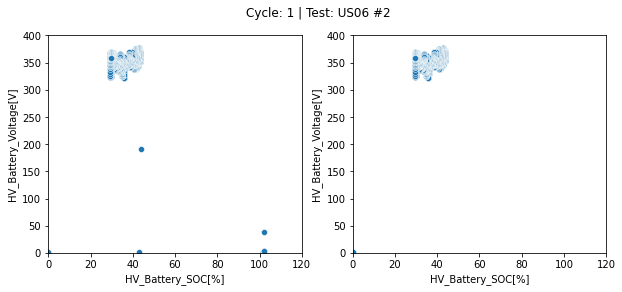

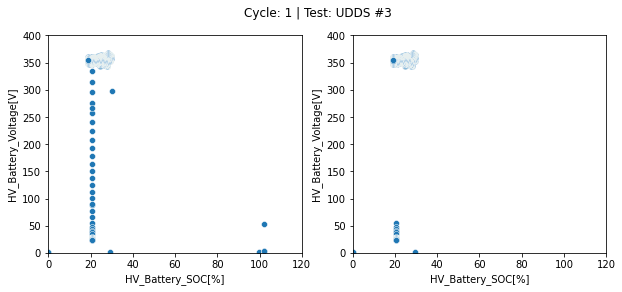

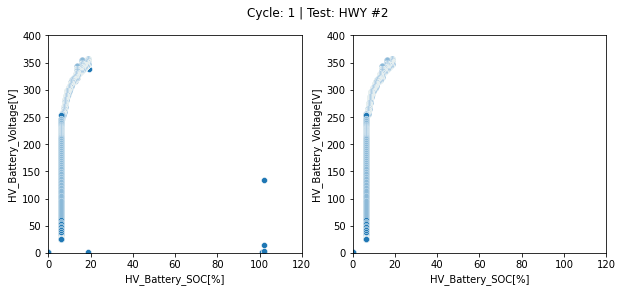

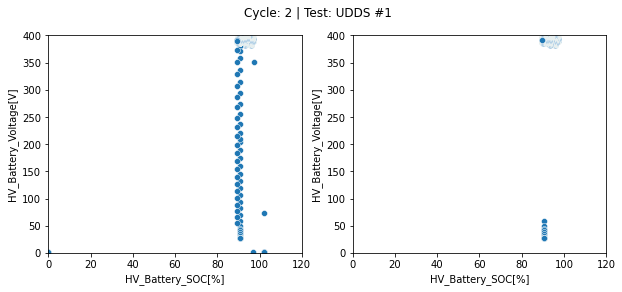

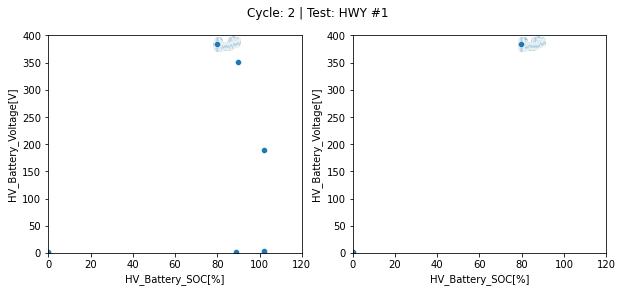

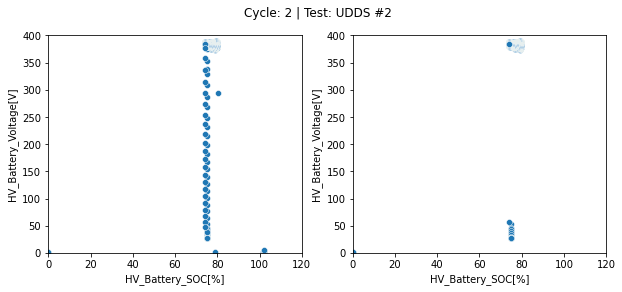

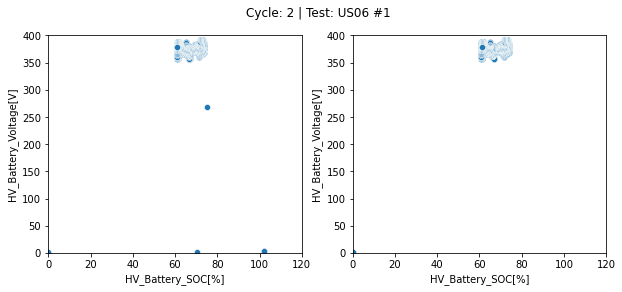

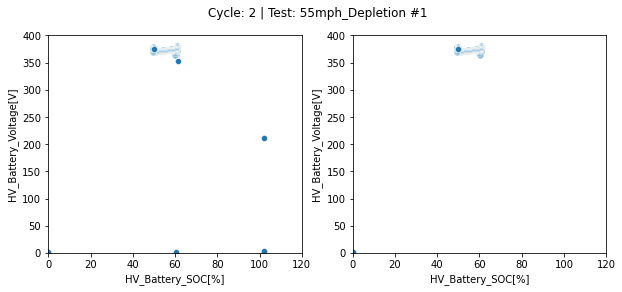

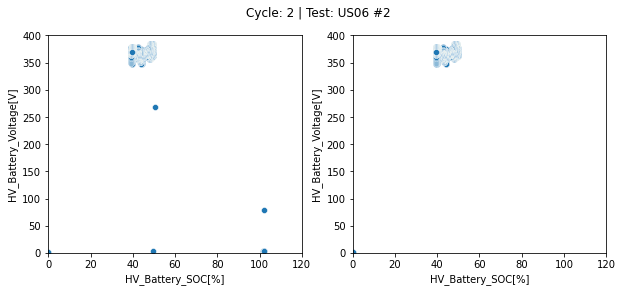

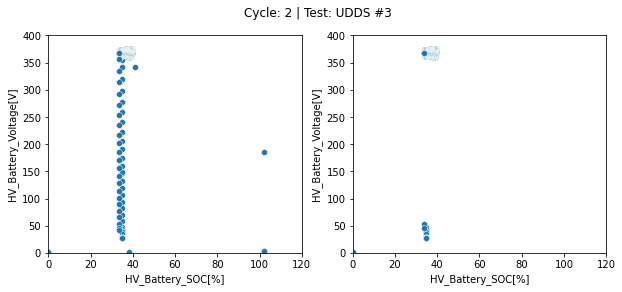

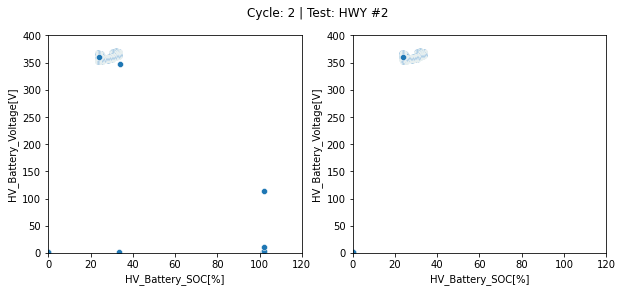

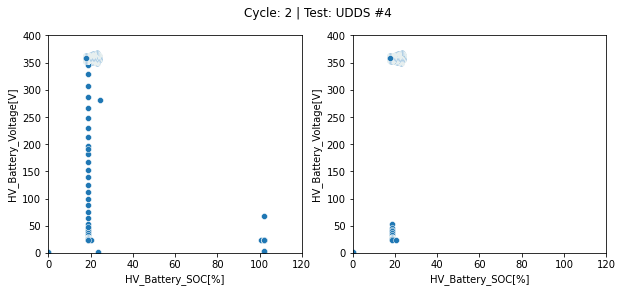

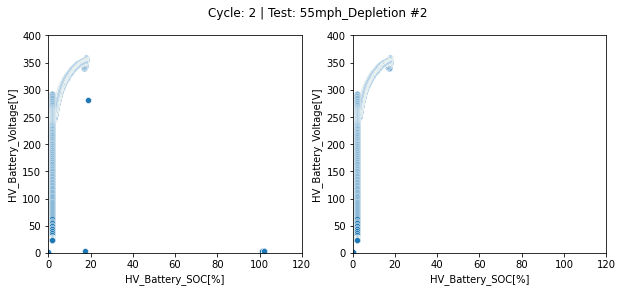

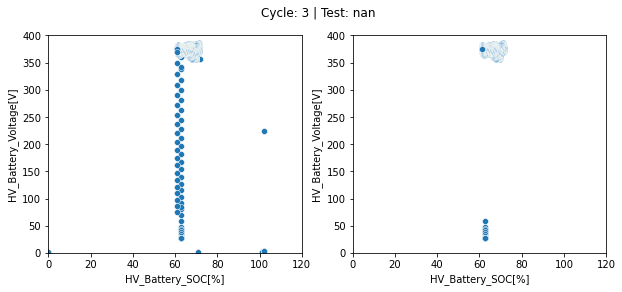

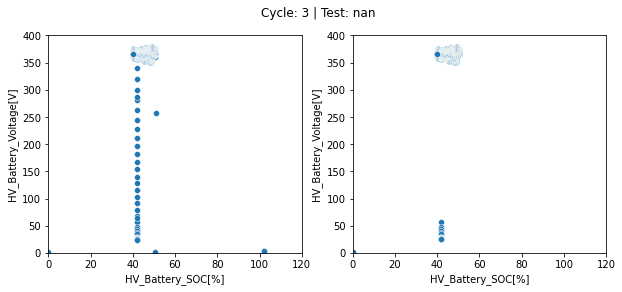

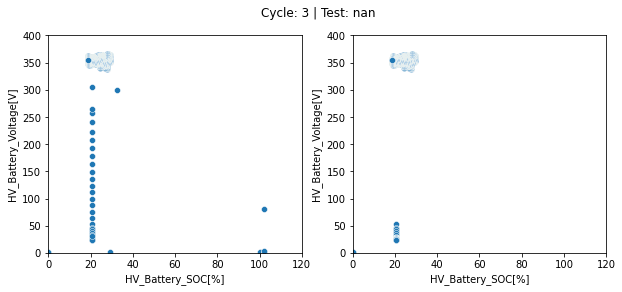

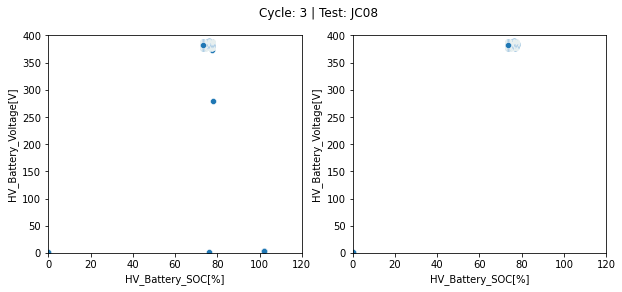

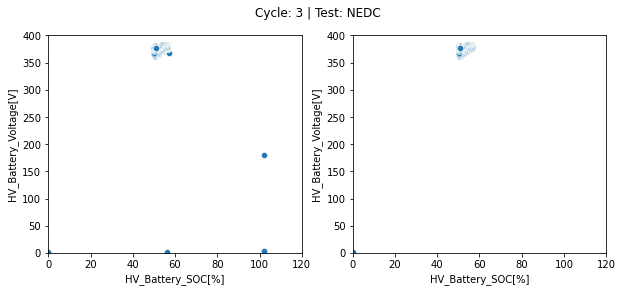

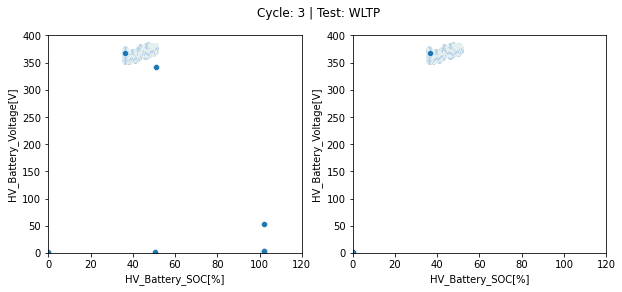

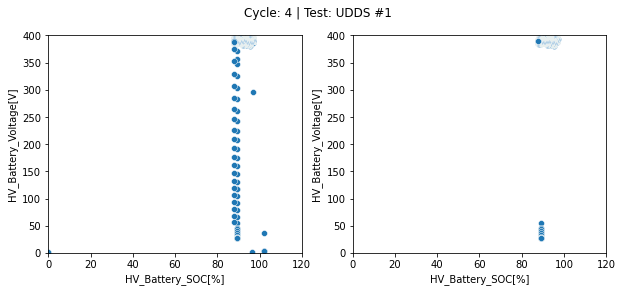

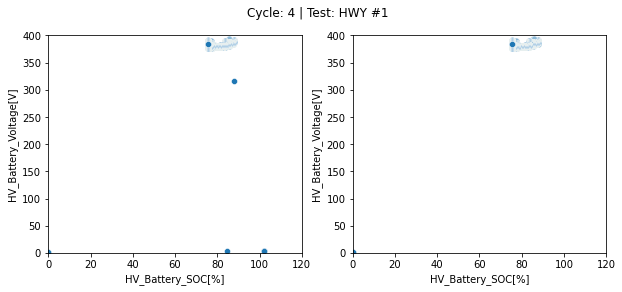

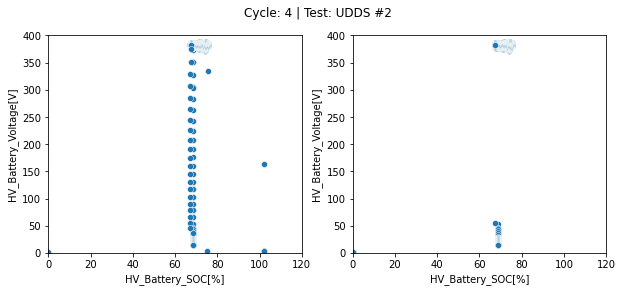

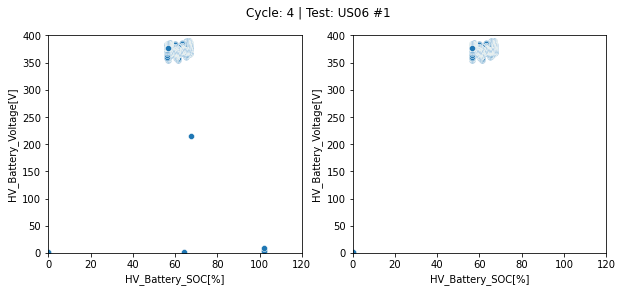

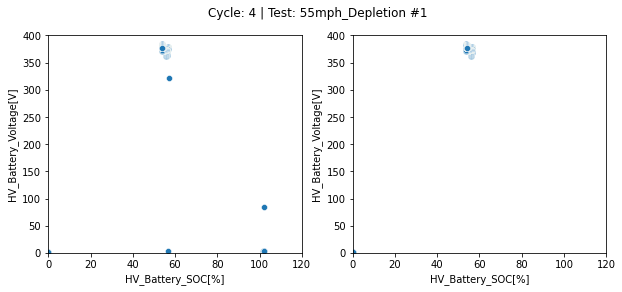

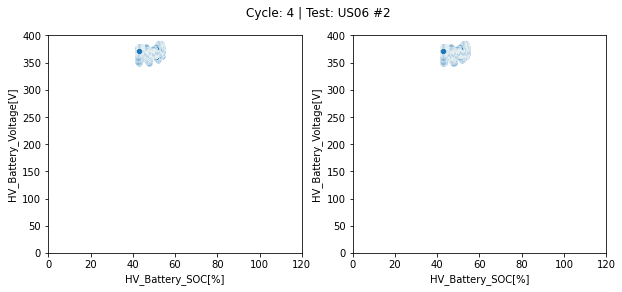

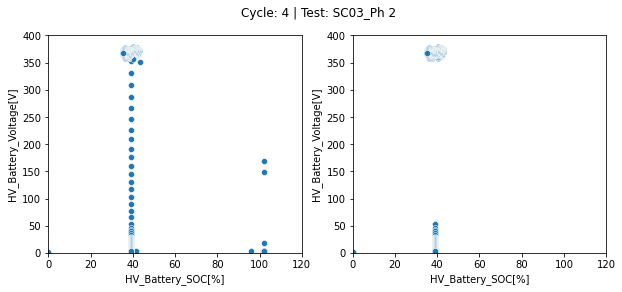

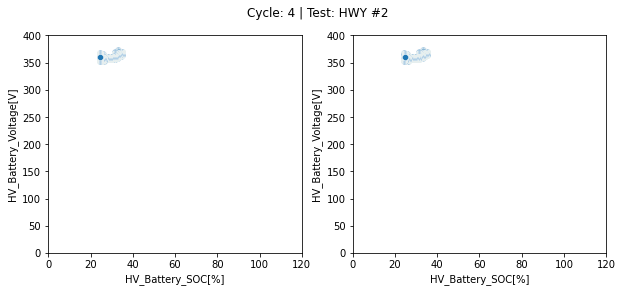

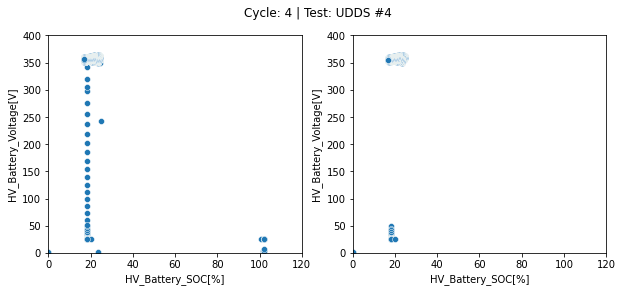

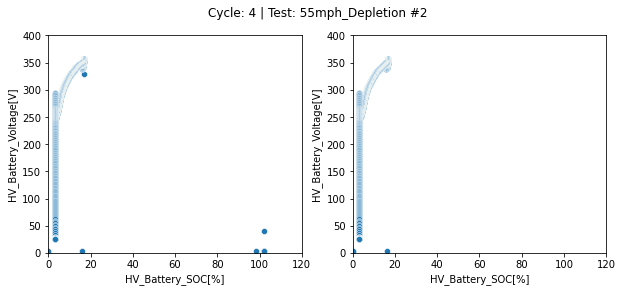

In [38]:
# Left past measurements | Right clean data
test_ids = df_filtered['test_id'].unique()

for id in test_ids:
    f = plt.figure(figsize=(10, 4))
    ax1 = f.add_subplot(1, 2, 1)
    test_data_raw = df_discharging_raw.loc[df_discharging_raw['test_id'] == id]
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data_raw, ax=ax1)
    ax1.set_xlim(0, 120)
    ax1.set_ylim(0, 400)
    
    ax2 = f.add_subplot(1, 2, 2)
    test_data = df_filtered.loc[df_filtered['test_id'] == id]
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=test_data, ax=ax2)
    ax2.set_xlim(0, 120)
    ax2.set_ylim(0, 400)
    
    test_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Cycle']
    charge_id = df_test_setup_raw.loc[df_test_setup_raw['Test ID [#]'] == id]['Charge']
    f.suptitle(f"Cycle: {charge_id.item()} | Test: {test_id.item()}")

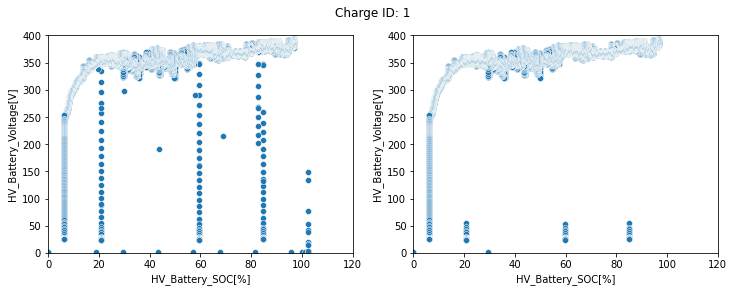

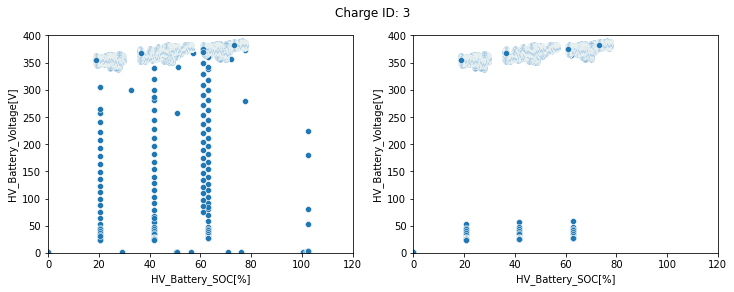

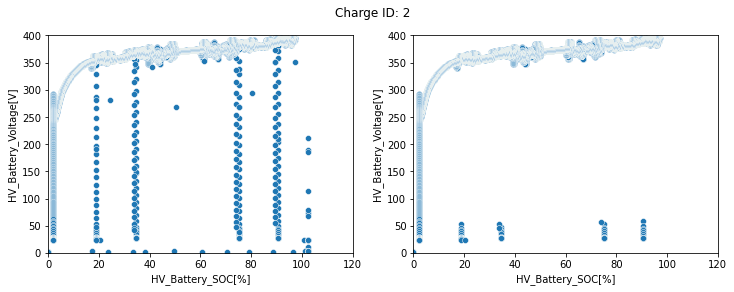

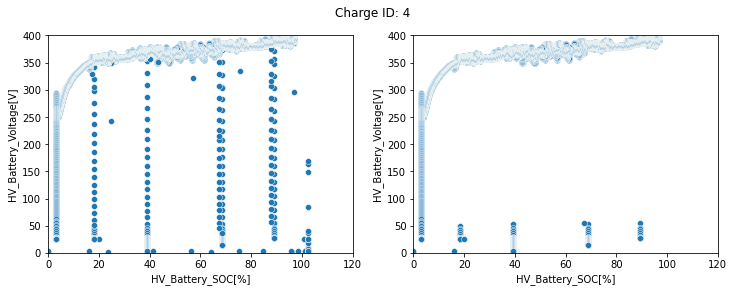

In [39]:
charge_ids = df_test_setup_raw['Charge'].unique()
for id_c in charge_ids:
    f = plt.figure(figsize=(12, 4))
    ax1 = f.add_subplot(1, 2, 1)
    ax2 = f.add_subplot(1, 2, 2)
    
    filtered_test = pd.DataFrame()
    actual_test= pd.DataFrame()
    original_test = pd.DataFrame()
    
    test_ids = df_test_setup_raw.loc[df_test_setup_raw['Charge'] == id_c]['Test ID [#]']
    for id_t in test_ids:
        actual_filtered_test = df_filtered[df_filtered['test_id'] == id_t]
        filtered_test = pd.concat([filtered_test, actual_filtered_test])
        
        actual_original_test = df_discharging_raw[df_discharging_raw['test_id'] == id_t]
        original_test = pd.concat([original_test, actual_original_test])
        
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=original_test, ax=ax1)
    ax1.set_xlim(0, 120)
    ax1.set_ylim(0, 400)
    
    sns.scatterplot(x='HV_Battery_SOC[%]', y='HV_Battery_Voltage[V]', palette='hls', data=filtered_test, ax=ax2)
    ax2.set_xlim(0, 120)
    ax2.set_ylim(0, 400)
    
    f.suptitle(f"Charge ID: {id_c}")

In [40]:
df = df_frst_last.loc[(df_frst_last['HV_Battery_SOC[%]'] < 100) & (df_frst_last['HV_Battery_SOC[%]'] != 0)]
df_grouped = df.groupby(['test_id','HV_Battery_SOC[%]'])
df_grouped.head()

,Time[sec],Dyno_Speed[mph],Dyno_Tractive_Effort[N],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%],Accelerator_Pedal_Position[%],...,Hood Position [Up] or [Closed],Window Position [Closed] or [Down],Cycle Distance [mi],Cycle Fuel economy [mpg] (Emiss Bag),Cycle HV battery Integrated net current [DC Ah],Cycle HV battery Average Zero crossing Voltage [V],Cycle HV battery Net Energy [DC Wh],Cycle HV battery Net Energy Consumption[DC Wh/mi],Cycle,Charge
28,-7.200,0.010,-12.138,22.251,40.688,0.0,-0.009,2.465,96.651,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
35,-6.500,0.010,-12.353,22.250,40.687,0.0,1.134,351.245,97.149,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
36,-6.400,0.010,-12.297,22.250,40.687,0.0,0.144,391.373,97.100,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
37,-6.300,0.010,-12.245,22.250,40.688,0.0,0.084,393.982,97.100,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
38,-6.200,0.010,-12.286,22.250,40.687,0.0,0.084,394.612,97.100,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
39,-6.100,0.009,-12.317,22.251,40.687,0.0,0.081,394.608,97.100,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
40,-6.000,0.009,-12.224,22.250,40.688,0.0,0.082,394.629,97.100,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
13831,1373.099,0.009,-12.216,20.557,52.797,2.0,0.407,390.864,89.500,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
13832,1373.199,0.009,-12.276,20.557,52.798,2.0,0.401,390.872,89.500,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2
13833,1373.299,0.010,-12.156,20.555,52.799,2.0,0.409,390.866,89.500,0.0,...,Closed,Down,7.44,-,3.521,391.1,1350.4,181.5,UDDS #1,2


In [41]:
for value, data in df_grouped:
    print(value)
    print(len(data))
    if len(data) == 40:
        start_test_index = data.index.min()
        print(start_test_index)

('61403011', 89.5)
40
13831
('61403011', 96.651)
1
('61403011', 97.1)
24
('61403011', 97.149)
1
('61403012', 79.9)
40
21612
('61403012', 88.676)
1
('61403012', 89.4)
8
('61403012', 89.563)
1
('61403013', 74.0)
40
35483
('61403014', 61.0)
40
41624
('61403014', 70.394)
1
('61403015', 49.9)
40
48775
('61403015', 60.627)
1
('61403015', 60.9)
12
('61403015', 61.303)
1
('61403016', 39.6)
40
54916
('61403016', 49.482)
1
('61403016', 49.8)
28
('61403016', 50.372)
1
('61403017', 33.7)
40
68787
('61403018', 23.9)
40
76568
('61403018', 33.562)
1
('61403018', 33.6)
45
('61403018', 34.094)
1
('61403019', 17.8)
40
90439
('61403020', 2.0)
40
99773
('61403020', 17.311)
1
('61403020', 17.7)
1
('61403020', 18.924)
1
('61403021', 87.8)
40
113644
('61403021', 96.24)
1
('61403021', 97.0)
19
('61403021', 97.061)
1
('61403022', 75.6)
40
121425
('61403022', 84.733)
1
('61403022', 87.7)
24
('61403022', 87.753)
1
('61403023', 67.3)
18
('61403023', 67.304)
1
('61403023', 67.4)
21
('61403023', 75.327)
1
('6140302